In [51]:
# -*- coding: utf-8 -*-
%matplotlib inline

import re
import pandas as pd
import numpy as np
import math
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import locale
import arrow
from locale import atof
from dateutil import parser
from datetime import datetime

plt.style.use('fivethirtyeight')

In [52]:
# Import default-only data

# FY 2014, FY 2013, and FY 2012 official cohort default rates published 
# for schools participating in the Title IV student financial assistance programs.
default_all_schools = pd.read_csv('data/_default/peps300_all.csv') 

# Schools subject to loss of Direct Loan Program and/or Pell Grant Program eligibility due
# to FY 2014, FY 2013, and FY 2012 official cohort default rates of 30% or greater. 
default_30plus = pd.read_csv('data/_default/peps304_30+default.csv')

# Schools subject to loss of Direct Loan Program due to FY 2014 official cohort 
# default rates greater than 40%.
default_40plus = pd.read_csv('data/_default/peps305_40+default.csv')

# FY 2014 official cohort default rates published for schools that may be eligible 
# for Benefits due to cohort default rates 5.0% and below.
default_5below = pd.read_csv('data/_default/peps751_5-default.csv')

# FY 2014, FY 2013, and FY 2012 official cohort default rates published for schools 
# that may be eligible for Benefits due to cohort default rates 15.0% and below for 3 years.
default_15below = pd.read_csv('data/_default/peps753_15-default.csv')

In [53]:
# Functions
def replace_year(string):
    lastChar = string.strip()[-1]
    if (lastChar == '1'):
        string = re.sub(r'1', '2014', string)
    elif (lastChar == '2'):
        string = re.sub(r'2', '2013', string)
    elif (lastChar == '3'):
        string = re.sub(r'3', '2012', string)
    return string
    
def classify(string):
    string = re.sub(r'\(|\)', '', string)
    classified = string.lower().strip().replace(' ','-')
    classified = classified.replace('\n', '-')
    return classified

def find_share(num,total):
    return round((num / total)*100, 2)

def remove_spec_chars(string):
    string = string.replace('$','')
    string = string.replace(',','')
    num = float(string)
    return num    

def find_beauty_schools(string):
    string = str.lower(string)
    if (string.find('cosme') != -1):
        return True
    elif (string.find('beaut') != -1):
        return True
    elif (string.find('barber') != -1):
        return True
    elif (string.find('make') != -1):
        return True
    elif (string.find('hair') != -1):
        return True
    else:
        return False


In [54]:
# rename and classify headers
default_all_schools.rename(columns=lambda c: replace_year(c), inplace=True)
default_all_schools.rename(columns=lambda c: classify(c), inplace=True)
default_all_schools.head()

,opeid,name,address,city,state,state-desc,zip-code,zip-ext,prog-length,school-type,...,year-2013,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,year-2012,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA ...,35762,1357,8,1,...,2013,300,1812,16.5,A,2012,326,1895,17.2,A
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA ...,36109,3398,8,2,...,2013,143,1491,9.5,A,2012,143,1417,10.0,A
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA ...,35115,6000,8,1,...,2013,57,744,7.6,A,2012,83,805,10.3,A
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA ...,36104,5714,8,1,...,2013,367,2196,16.7,P,2012,334,2137,15.6,P
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA ...,35010,0000,5,1,...,2013,146,659,22.1,P,2012,144,656,21.9,P


In [55]:
# Create dataframes for different school types
# by school type
public_schools = default_all_schools[default_all_schools['school-type'] == 1]
privatenp_schools = default_all_schools[default_all_schools['school-type'] == 2]
proprietary_schools = default_all_schools[default_all_schools['school-type'] == 3]

# by ethnic school type
nativeamer_schools = default_all_schools[default_all_schools['ethnic-code'] == 1]
hbcu_schools = default_all_schools[default_all_schools['ethnic-code'] == 2]
hispanic_schools = default_all_schools[default_all_schools['ethnic-code'] == 3]

In [56]:
# make a condensed dataset 
default_cond = default_all_schools.drop(['address','city','state-desc','zip-code','zip-ext','cong-dis','region','year-2014','year-2013','year-2012'],axis=1)

### By ethnicity code

In [57]:
# hbcu average default rate
print('hbcu average 2014 default rate: %s' % default_cond[default_cond['ethnic-code'] == 2]['dual-num-2014'].mean())
print('hbcu average 2013 default rate: %s' % default_cond[default_cond['ethnic-code'] == 2]['dual-num-2013'].mean())
print('hbcu average 2012 default rate: %s' % default_cond[default_cond['ethnic-code'] == 2]['dual-num-2012'].mean())

# native amer average default rate
print('native amer 2014 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 1]['dual-num-2014'].mean())
print('native amer 2013 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 1]['dual-num-2013'].mean())
print('native amer 2012 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 1]['dual-num-2012'].mean())

# hispanic average default rate
print('hispanic 2014 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 3]['dual-num-2014'].mean())
print('hispanic 2013 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 3]['dual-num-2013'].mean())
print('hispanic 2012 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 3]['dual-num-2012'].mean())

# pwi default rate
print('pwi average 2014 default rate: %s' % default_cond[default_cond['ethnic-code'] == 5]['dual-num-2014'].mean())
print('pwi average 2013 default rate: %s' % default_cond[default_cond['ethnic-code'] == 5]['dual-num-2013'].mean())
print('pwi average 2012 default rate: %s' % default_cond[default_cond['ethnic-code'] == 5]['dual-num-2012'].mean())

print('\ntrend: hispanic default rate avg steadily rising')

hbcu average 2014 default rate: 169.595744681
hbcu average 2013 default rate: 174.031914894
hbcu average 2012 default rate: 179.382978723
native amer 2014 average default rate: 47.0
native amer 2013 average default rate: 63.0
native amer 2012 average default rate: 58.5
hispanic 2014 average default rate: 196.692307692
hispanic 2013 average default rate: 190.111888112
hispanic 2012 average default rate: 188.972027972
pwi average 2014 default rate: 121.034444196
pwi average 2013 default rate: 117.460299709
pwi average 2012 default rate: 118.750167748

trend: hispanic default rate avg steadily rising


In [58]:
# default_cond[default_cond['ethnic-code'] == 3]

### Highest (and lowest) number of defaulters per year
The University of Pheonix has the highest number of defaulters each year.

TODO: find a way to scale by school size

In [59]:
# find the highest number of defaulters in 2014
default_cond['dual-num-2014'].max() # 20528
print('University of Phoenix has the highest amount of defaulters in 2014 with %s defaulters' % default_cond['dual-num-2014'].max())
default_cond[default_cond['dual-num-2014'] == 20528]

University of Phoenix has the highest amount of defaulters in 2014 with 20528 defaulters


,opeid,name,state,prog-length,school-type,dual-num-2014,dual-denom-2014,drate-2014,prate-2014,ethnic-code,program,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
3049,20988,UNIVERSITY OF PHOENIX ...,AZ,8,3,20528,159144,12.8,A,5,D,26004,194107,13.3,A,27288,201163,13.5,A


In [60]:
default_cond['drate-2014'].max() 
default_cond[default_cond['drate-2014'] == 56.200000000000003]

,opeid,name,state,prog-length,school-type,dual-num-2014,dual-denom-2014,drate-2014,prate-2014,ethnic-code,program,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
4572,41746,NASHVILLE BARBER AND STYLE ACADEMY ...,TN,3,3,18,32,56.2,A,5,D,22,56,39.2,A,10,16,62.5,B


In [61]:
# find the highest number of defaulters in 2013
default_cond['dual-num-2013'].max() # 26004
print('University of Phoenix has the highest amount of defaulters in 2013 with %s defaulters' % default_cond['dual-num-2013'].max())
default_cond[default_cond['dual-num-2013'] == 26004]

University of Phoenix has the highest amount of defaulters in 2013 with 26004 defaulters


,opeid,name,state,prog-length,school-type,dual-num-2014,dual-denom-2014,drate-2014,prate-2014,ethnic-code,program,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
3049,20988,UNIVERSITY OF PHOENIX ...,AZ,8,3,20528,159144,12.8,A,5,D,26004,194107,13.3,A,27288,201163,13.5,A


In [62]:
# find the highest number of defaulters in 2012
default_cond['dual-num-2012'].max() # 27288
print('University of Phoenix has the highest amount of defaulters in 2012 with %s defaulters' % default_cond['dual-num-2012'].max())
default_cond[default_cond['dual-num-2012'] == 27288]

University of Phoenix has the highest amount of defaulters in 2012 with 27288 defaulters


,opeid,name,state,prog-length,school-type,dual-num-2014,dual-denom-2014,drate-2014,prate-2014,ethnic-code,program,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
3049,20988,UNIVERSITY OF PHOENIX ...,AZ,8,3,20528,159144,12.8,A,5,D,26004,194107,13.3,A,27288,201163,13.5,A


In [78]:
default_all_schools.sort_values('drate-2014', ascending=False).head(10).to_csv('exports/data/highest_default_rates_2014.csv')
default_all_schools.sort_values('drate-2014', ascending=False).head(10)


,opeid,name,address,city,state,state-desc,zip-code,zip-ext,prog-length,school-type,...,year-2013,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,year-2012,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
4572,41746,NASHVILLE BARBER AND STYLE ACADEMY ...,968 MADISON SQUARE ...,MADISON,TN,TENNESSEE ...,37115,0000,3,3,...,2013,22,56,39.2,A,2012,10,16,62.5,B
4653,41951,AMBIANCE BEAUTY & BARBER ACADEMY ...,682 WICKHAM ROAD ...,MELBOURNE,FL,FLORIDA ...,32935,8771,3,3,...,2013,6,10,60.0,B,2012,0,0,0.0,A
3394,22982,HEADQUARTERS ACADEMY OF HAIR DESIGN ...,108 SOUTH MAIN STREET ...,MINOT,ND,NORTH DAKOTA ...,58701,3914,4,3,...,2013,4,30,13.3,A,2012,7,40,17.5,A
3303,22429,UNITED TRIBES TECHNICAL COLLEGE ...,3315 UNIVERSITY DRIVE ...,BISMARCK,ND,NORTH DAKOTA ...,58504,7596,6,2,...,2013,51,125,40.8,A,2012,62,139,44.6,A
4634,41890,LONG ISLAND BARBER INSTITUTE (THE) ...,266 GREENWICH STREET ...,HEMPSTEAD,NY,NEW YORK ...,11550,6317,2,3,...,2013,8,21,38.0,B,2012,0,1,0.0,B
4314,41176,LARRY'S BARBER COLLEGE ...,10456 S. HALSTED STREET ...,CHICAGO,IL,ILLINOIS ...,60628,2322,3,3,...,2013,15,31,48.3,A,2012,1,2,50.0,B
3464,23394,ROB ROY ACADEMY ...,1872 ACUSHNET AVENUE ...,NEW BEDFORD,MA,MASSACHUSETTS ...,02746,2114,3,3,...,2013,12,35,34.2,A,2012,11,63,17.4,B
2950,12948,ROB ROY ACADEMY ...,260 SOUTH MAIN STREET ...,FALL RIVER,MA,MASSACHUSETTS ...,02721,5330,3,3,...,2013,39,99,39.3,A,2012,30,127,23.6,A
4532,41669,COSMETIC ARTS INSTITUTE ...,1789 HAMPTON STREET ...,WALTERBORO,SC,SOUTH CAROLINA ...,29488,4216,3,3,...,2013,11,34,32.3,A,2012,14,31,45.1,B
3699,30050,SAFFORD COLLEGE OF BEAUTY CULTURE ...,1550 WEST THATCHER BOULEVARD ...,SAFFORD,AZ,ARIZONA ...,85546,3309,3,3,...,2013,25,92,27.1,B,2012,11,37,29.7,A


### No Defaulters

In [64]:
# default_cond[default_cond['dual-num-2014'] == 0].count() # 114
# default_cond[default_cond['dual-num-2013'] == 0].count() # 151
# default_cond[default_cond['dual-num-2012'] == 0].count() # 223

print('the number of schools with no defaulters has been going down from 223 in 2012 to 114 in 2014')

the number of schools with no defaulters has been going down from 223 in 2012 to 114 in 2014


In [65]:
# list(default_cond)

In [66]:
def no_defaulters(y2014,y2013,y2012):
    num = ''
    if (y2014 == 0 and y2013 == 0 and y2012 == 0):
        num += 'ALL'
        return num
#     if (y2013 == 0 and y2012 == 0):
#         num += '2013, 2012'
#     if (y2014 == 0 and y2013 == 0):
#         num += '2014, 2013'
#     if (y2014 == 0 and y2012 == 0):
#         num += '2014, 2012'
    if (y2014 == 0):
        num += '2014'
    if (y2013 == 0):
        num += ' 2013'
    if (y2012 == 0):
        num += ' 2012'
    return num.strip()

default_cond['non_default'] = np.vectorize(no_defaulters)(default_cond['drate-2014'],default_cond['drate-2013'],default_cond['drate-2012'])
default_cond[default_cond['non_default'] != ''].to_csv('data/_default/no_defaults_by_year.csv')
default_cond[default_cond['non_default'] != '']

,opeid,name,state,prog-length,school-type,dual-num-2014,dual-denom-2014,drate-2014,prate-2014,ethnic-code,program,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,dual-num-2012,dual-denom-2012,drate-2012,prate-2012,non_default
22,1038,SNEAD STATE COMMUNITY COLLEGE ...,AL,5,1,113,372,30.3,A,5,D,36,106,33.9,A,0,0,0.0,A,2012
66,1105,SHORTER COLLEGE ...,AR,5,2,19,82,23.1,A,2,D,8,17,47.0,B,0,0,0.0,A,2012
82,1131,CALIFORNIA INSTITUTE OF TECHNOLOGY ...,CA,8,2,0,37,0.0,A,5,D,2,104,1.9,B,1,39,2.5,A,2014
111,1170,CLAREMONT MCKENNA COLLEGE ...,CA,8,2,0,56,0.0,A,5,D,0,63,0.0,A,0,64,0.0,A,ALL
112,1171,HARVEY MUDD COLLEGE ...,CA,6,2,0,141,0.0,A,5,D,1,134,0.7,A,0,124,0.0,A,2014 2012
114,1173,POMONA COLLEGE ...,CA,6,2,0,64,0.0,A,5,D,1,57,1.7,A,0,69,0.0,A,2014 2012
115,1174,SCRIPPS COLLEGE ...,CA,6,2,0,104,0.0,A,5,D,1,104,0.9,A,3,104,2.8,A,2014
139,1207,GRADUATE THEOLOGICAL UNION ...,CA,8,2,0,44,0.0,A,5,D,1,82,1.2,B,1,78,1.2,B,2014
155,1230,MARSHALL B. KETCHUM UNIVERSITY ...,CA,8,2,0,114,0.0,P,5,D,0,102,0.0,P,0,102,0.0,P,ALL
166,1249,OCCIDENTAL COLLEGE ...,CA,8,2,2,359,0.5,A,5,D,0,294,0.0,A,8,284,2.8,A,2013


### By school type

In [67]:
# TODO: see if there's a difference between the default rates avgd and summing the defaulters all together then finding the avg

# public average default rate
print('public average 2014 default rate: %s' % default_cond[default_cond['school-type'] == 1]['drate-2014'].mean())
print('public average 2013 default rate: %s' % default_cond[default_cond['school-type'] == 1]['drate-2013'].mean())
print('public average 2012 default rate: %s' % default_cond[default_cond['school-type'] == 1]['drate-2012'].mean())

# private average default rate
print('private average 2014 default rate: %s' % default_cond[default_cond['school-type'] == 2]['drate-2014'].mean())
print('private average 2013 default rate: %s' % default_cond[default_cond['school-type'] == 2]['drate-2013'].mean())
print('private average 2012 default rate: %s' % default_cond[default_cond['school-type'] == 2]['drate-2012'].mean())

# proprietary average default rate
print('proprietary average 2014 default rate: %s' % default_cond[default_cond['school-type'] == 3]['drate-2014'].mean())
print('proprietary average 2013 default rate: %s' % default_cond[default_cond['school-type'] == 3]['drate-2013'].mean())
print('proprietary average 2012 default rate: %s' % default_cond[default_cond['school-type'] == 3]['drate-2012'].mean())

# print('\ntrend: hispanic default rate avg steadily rising')

public average 2014 default rate: 13.4463399109
public average 2013 default rate: 13.3687460216
public average 2012 default rate: 13.7515595162
private average 2014 default rate: 6.62674339878
private average 2013 default rate: 6.33249830738
private average 2012 default rate: 6.44292484766
proprietary average 2014 default rate: 12.8942115768
proprietary average 2013 default rate: 12.6222222222
proprietary average 2012 default rate: 12.8395209581


In [68]:
# default_cond[default_cond['dual-num-2014']]
# .head()

In [69]:
# default_cond['drate-2013'].mean()
# default_cond[default_cond['school-type'] == 3]['dual-num-2012']

In [70]:
# school types: (1) public, (2) private np, (3) proprietary
default_cond.groupby('school-type').mean().reset_index().drop(['opeid','prog-length','ethnic-code'], axis=1).sort_values('dual-num-2014',ascending=False)


,school-type,dual-num-2014,dual-denom-2014,drate-2014,dual-num-2013,dual-denom-2013,drate-2013,dual-num-2012,dual-denom-2012,drate-2012
0,1,195.132400,1730.290261,13.446340,198.366009,1749.326544,13.368746,195.401655,1668.945258,13.751560
2,3,109.085163,743.896208,12.894212,111.424484,787.467066,12.622222,122.337325,819.266800,12.839521
1,2,77.457684,942.330399,6.626743,60.522681,820.888287,6.332498,56.706838,785.668246,6.442925
4,6,6.677419,85.000000,6.264516,6.419355,82.387097,6.548387,6.387097,79.709677,6.674194
5,7,4.600000,552.600000,0.620000,3.600000,586.800000,0.660000,2.800000,588.800000,0.620000
3,5,2.072000,64.176000,3.760800,1.992000,60.920000,3.655200,1.872000,59.688000,3.560800


### By state

In [71]:
# find the average default number by state
avgDefaulters_byState = default_cond.groupby('state').mean().reset_index().drop(['opeid','prog-length','ethnic-code'], axis=1)
avgDefaulters_byState
# default_cond[default_cond['state'] == 'FC']


,state,school-type,dual-num-2014,dual-denom-2014,drate-2014,dual-num-2013,dual-denom-2013,drate-2013,dual-num-2012,dual-denom-2012,drate-2012
0,AK,1.571429,100.000000,775.857143,13.971429,90.142857,770.000000,12.385714,98.714286,764.000000,14.057143
1,AL,1.709091,192.800000,1461.218182,14.283636,178.818182,1461.963636,13.352727,168.709091,1418.200000,12.221818
2,AR,1.790323,89.290323,758.645161,13.727419,113.225806,860.467742,15.022581,114.241935,831.693548,15.201613
3,AZ,2.318182,631.030303,4612.151515,14.604545,734.924242,5258.803030,13.987879,764.136364,5346.636364,14.628788
4,CA,2.105495,73.019780,817.074725,10.631648,79.986813,859.883516,10.340440,87.657143,848.090110,10.784176
5,CO,2.135802,138.320988,1240.111111,9.896296,141.395062,1266.382716,10.286420,160.246914,1382.382716,9.860494
6,CT,2.055556,102.666667,1066.833333,8.751852,74.796296,895.796296,8.957407,76.462963,886.500000,7.657407
7,DC,2.235294,271.176471,2701.411765,10.217647,228.352941,2678.058824,9.323529,239.176471,2718.764706,9.423529
8,DE,2.214286,80.428571,853.500000,11.085714,85.428571,854.428571,12.364286,63.357143,727.857143,11.042857
9,FC,5.254658,3.037267,83.354037,4.145342,2.894410,81.385093,4.119255,2.770186,79.975155,4.068944


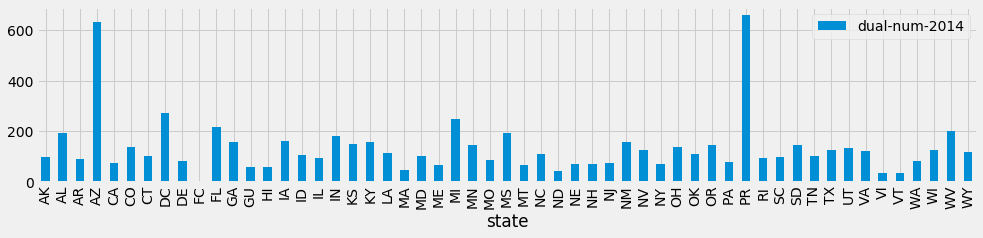

In [72]:
avgDefaulters_byState.plot(kind='bar',x='state',y='dual-num-2014', figsize=[15,3])
# .sort_values('dual-num-2014',ascending=False)

### schools with 30+ and 40+ default rates

In [73]:
# rename and classify headers
default_30plus = default_30plus[:6]
default_30plus.rename(columns=lambda c: replace_year(c), inplace=True)
default_30plus.rename(columns=lambda c: classify(c), inplace=True)
default_30plus

,opeid,name,address,city,state,state-desc,zip-code,zip-ext,prog-length,school-type,...,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,year-2012,dual-num-2012,dual-denom-2012,drate-2012,prate-2012,dd
0,1998.0,SOUTHEAST KENTUCKY COMMUNITY AND TECHNICAL COL...,700 COLLEGE ROAD ...,CUMBERLAND,KY,KENTUCKY ...,40823.0,1099.0,5.0,1.0,...,202.0,635.0,31.8,P,2012.0,146.0,451.0,32.3,P,NaN
1,20568.0,DAYMAR COLLEGE ...,3879 RHODES AVENUE ...,NEW BOSTON,OH,OHIO ...,45662.0,4900.0,5.0,3.0,...,191.0,561.0,34.0,A,2012.0,275.0,816.0,33.7,A,NaN
2,22429.0,UNITED TRIBES TECHNICAL COLLEGE ...,3315 UNIVERSITY DRIVE ...,BISMARCK,ND,NORTH DAKOTA ...,58504.0,7596.0,6.0,2.0,...,51.0,125.0,40.8,A,2012.0,62.0,139.0,44.6,A,NaN
3,36803.0,JAY'S TECHNICAL INSTITUTE ...,11910 FONDREN MEADOW DR. ...,HOUSTON,TX,TEXAS ...,77071.0,3509.0,3.0,3.0,...,48.0,103.0,46.6,A,2012.0,35.0,67.0,52.2,A,NaN
4,38763.0,CULPEPER COSMETOLOGY TRAINING CENTER ...,311 SOUTH EAST STREET #120 ...,CULPEPER,VA,VIRGINIA ...,22701.0,3105.0,3.0,1.0,...,15.0,42.0,35.7,B,2012.0,12.0,32.0,37.5,B,NaN
5,41669.0,COSMETIC ARTS INSTITUTE ...,1789 HAMPTON STREET ...,WALTERBORO,SC,SOUTH CAROLINA ...,29488.0,4216.0,3.0,3.0,...,11.0,34.0,32.3,A,2012.0,14.0,31.0,45.1,B,NaN


In [74]:
# rename and classify headers
default_40plus.rename(columns=lambda c: replace_year(c), inplace=True)
default_40plus.rename(columns=lambda c: classify(c), inplace=True)
default_40plus = default_40plus[:5]
default_40plus

,opeid,name,address,city,city_2013,state-desc,zip-code,zip-ext,prog-length,school-type,...,year-2013,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,year-2012,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
0,22429.0,UNITED TRIBES TECHNICAL COLLEGE ...,3315 UNIVERSITY DRIVE ...,BISMARCK,BISMARCK,NORTH DAKOTA ...,58504.0,7596.0,6.0,2.0,...,2013.0,51.0,125.0,40.8,A,2012.0,62.0,139.0,44.6,A
1,22982.0,HEADQUARTERS ACADEMY OF HAIR DESIGN ...,108 SOUTH MAIN STREET ...,MINOT,ND,NORTH DAKOTA ...,58701.0,3914.0,4.0,3.0,...,2013.0,4.0,30.0,13.3,A,2012.0,7.0,40.0,17.5,A
2,41176.0,LARRY'S BARBER COLLEGE ...,10456 S. HALSTED STREET ...,CHICAGO,CHICAGO,ILLINOIS ...,60628.0,2322.0,3.0,3.0,...,2013.0,15.0,31.0,48.3,A,2012.0,1.0,2.0,50.0,B
3,41746.0,NASHVILLE BARBER AND STYLE ACADEMY ...,968 MADISON SQUARE ...,MADISON,MADISON,TENNESSEE ...,37115.0,0.0,3.0,3.0,...,2013.0,22.0,56.0,39.2,A,2012.0,10.0,16.0,62.5,B
4,41890.0,LONG ISLAND BARBER INSTITUTE (THE) ...,266 GREENWICH STREET ...,HEMPSTEAD,NY,NEW YORK ...,11550.0,6317.0,2.0,3.0,...,2013.0,8.0,21.0,38.0,B,2012.0,0.0,1.0,0.0,B


### Beauty schools

In [75]:
# make beauty_schools dataframe
beauty_schools = default_all_schools['name']
beauty_schools = beauty_schools.reset_index().drop('index',axis=1)

# apply find_beauty_schools function 
beauty_schools['keep'] = beauty_schools['name'].apply(find_beauty_schools)
beauty_schools_merg = beauty_schools.merge(default_all_schools, on='name')

# drop everything but beauty schools
beauty_schools_merg = beauty_schools_merg[beauty_schools_merg['keep'] == True]

In [76]:
beauty_schools_merg.mean()

keep                   1.000000
opeid              25538.526829
prog-length            3.187805
school-type            2.996341
year-2014           2014.000000
dual-num-2014         32.568293
dual-denom-2014      251.821951
drate-2014            12.428293
ethnic-code            5.000000
region                 5.009756
year-2013           2013.000000
dual-num-2013         28.481707
dual-denom-2013      237.992683
drate-2013            12.367073
year-2012           2012.000000
dual-num-2012         30.602439
dual-denom-2012      249.356098
drate-2012            12.984146
dtype: float64

In [77]:
beauty_schools_merg

,name,keep,opeid,address,city,state,state-desc,zip-code,zip-ext,prog-length,...,year-2013,dual-num-2013,dual-denom-2013,drate-2013,prate-2013,year-2012,dual-num-2012,dual-denom-2012,drate-2012,prate-2012
2475,NEWBERRY SCHOOL OF BEAUTY ...,True,7130,16852 DEVONSHIRE STREET ...,GRANADA HILLS,CA,CALIFORNIA ...,91344,7404,3,...,2013,6,112,5.3,P,2012,10,117,8.5,P
2476,LYLE'S COLLEGE OF BEAUTY ...,True,7142,6735 NORTH FIRST STREET SUITE 112 ...,FRESNO,CA,CALIFORNIA ...,93710,3948,3,...,2013,3,13,23.0,B,2012,0,0,0.0,A
2489,NORTH ADRIAN'S COLLEGE OF BEAUTY ...,True,7187,124 FLOYD AVENUE ...,MODESTO,CA,CALIFORNIA ...,95350,2381,3,...,2013,30,178,16.8,A,2012,43,219,19.6,A
2500,MODERN BEAUTY ACADEMY - OXNARD ...,True,7204,699 SOUTH C STREET ...,OXNARD,CA,CALIFORNIA ...,93030,7016,3,...,2013,5,30,16.6,A,2012,5,39,12.8,A
2503,FEDERICO BEAUTY INSTITUTE ...,True,7253,1515 SPORTS DRIVE ...,SACRAMENTO,CA,CALIFORNIA ...,95834,1905,3,...,2013,21,181,11.6,P,2012,22,177,12.4,P
2528,LONG ISLAND BEAUTY SCHOOL ...,True,7387,544 ROUTE 111 ...,HAUPPAUGE,NY,NEW YORK ...,11788,4346,3,...,2013,27,337,8.0,A,2012,19,316,6.0,A
2529,LONG ISLAND BEAUTY SCHOOL ...,True,7388,173 A FULTON AVENUE ...,HEMPSTEAD,NY,NEW YORK ...,11550,3704,3,...,2013,13,122,10.6,A,2012,12,120,10.0,A
2530,LONG ISLAND BEAUTY SCHOOL ...,True,7387,544 ROUTE 111 ...,HAUPPAUGE,NY,NEW YORK ...,11788,4346,3,...,2013,27,337,8.0,A,2012,19,316,6.0,A
2531,LONG ISLAND BEAUTY SCHOOL ...,True,7388,173 A FULTON AVENUE ...,HEMPSTEAD,NY,NEW YORK ...,11550,3704,3,...,2013,13,122,10.6,A,2012,12,120,10.0,A
2532,BEAUTY SCHOOL OF MIDDLETOWN ...,True,7391,225 DOLSON AVENUE SUITE 100 ...,MIDDLETOWN,NY,NEW YORK ...,10940,6574,3,...,2013,4,56,7.1,A,2012,6,64,9.3,A
